In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan
from functools import partial

from CASutils import averaging_utils as avg
from CASutils import plotposition_utils as plotpos
from CASutils import colorbar_utils as cbars

import matplotlib as mpl
import sys

import warnings
warnings.filterwarnings('ignore')

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/"
landfrac = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/LANDFRAC_LENS2.nc")

In [3]:
datpath="/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/FOR_FIG8/"
lens2stack = xr.open_dataset(datpath+"snow_lens2stack.nc")
aer2stack = xr.open_dataset(datpath+"snow_aer2stack.nc")
xaer2stack = xr.open_dataset(datpath+"snow_xaer2stack.nc")

lens2em = xr.open_dataset(datpath+"snow_lens2em.nc")
aer2em = xr.open_dataset(datpath+"snow_aer2em.nc")
xaer2em = xr.open_dataset(datpath+"snow_xaer2em.nc")

pnosnow = xr.open_dataset(datpath+"pnosnow_lens2.nc")
pnosnow_aer2 = xr.open_dataset(datpath+"pnosnow_aer2.nc")

In [4]:
lens2_1960_1980 = lens2em.sel(year=slice(1960,1980)).mean('year')
aer2_1960_1980 = aer2em.sel(year=slice(1960,1980)).mean('year')
xaer2_1960_1980 = xaer2em.sel(year=slice(1960,1980)).mean('year')

lens2_1920_1940 = lens2em.sel(year=slice(1920,1930)).mean('year')
aer2_1920_1940 = aer2em.sel(year=slice(1920,1930)).mean('year')
xaer2_1920_1940 = xaer2em.sel(year=slice(1920,1930)).mean('year')

lens2anoms_1960_1980 = lens2_1960_1980 - lens2_1920_1940
aer2anoms_1960_1980 = aer2_1960_1980 - aer2_1920_1940
xaer2anoms_1960_1980 = xaer2_1960_1980 - xaer2_1920_1940


In [5]:
datpath="/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/FOR_FIG8/"
lens2stack_ice = xr.open_dataset(datpath+"ice_lens2stack.nc")
aer2stack_ice = xr.open_dataset(datpath+"ice_aer2stack.nc")
xaer2stack_ice = xr.open_dataset(datpath+"ice_xaer2stack.nc")

lens2em_ice = xr.open_dataset(datpath+"ice_lens2em.nc")
aer2em_ice = xr.open_dataset(datpath+"ice_aer2em.nc")
xaer2em_ice = xr.open_dataset(datpath+"ice_xaer2em.nc")

pnoice = xr.open_dataset(datpath+"pnoice_lens2.nc")
pnoice_aer2 = xr.open_dataset(datpath+"pnoice_aer2.nc")

In [6]:
print(lens2stack_ice.isel(point=0).ICEFRAC.values)

[5.31817476e-01 1.95983609e-01 6.32147630e-01 ... 9.48939783e-04
 1.14135522e-04 1.06570846e-03]


In [7]:
lens2_1960_1980_ice = lens2em_ice.sel(year=slice(1960,1980)).mean('year')
aer2_1960_1980_ice = aer2em_ice.sel(year=slice(1960,1980)).mean('year')
xaer2_1960_1980_ice = xaer2em_ice.sel(year=slice(1960,1980)).mean('year')

lens2_1920_1940_ice = lens2em_ice.sel(year=slice(1920,1930)).mean('year')
aer2_1920_1940_ice = aer2em_ice.sel(year=slice(1920,1930)).mean('year')
xaer2_1920_1940_ice = xaer2em_ice.sel(year=slice(1920,1930)).mean('year')

lens2anoms_1960_1980_ice = lens2_1960_1980_ice - lens2_1920_1940_ice
aer2anoms_1960_1980_ice = aer2_1960_1980_ice - aer2_1920_1940_ice
xaer2anoms_1960_1980_ice = xaer2_1960_1980_ice - xaer2_1920_1940_ice

### Plot the plot

In [8]:
def setuppanel_fsno(lens2dat, aer2dat, xaer2dat, lens2datm, aer2datm, xaer2datm, x1, x2, y1, y2):
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_ylabel('Snow cover (%)', fontsize=14)
    ax.set_xlabel('Local T$_{S}$', fontsize=14)
    
    ax.plot( lens2dat.TREFHT, 100.*lens2dat.FSNO,"o", color='black', markersize=0.1, zorder=1)
    ax.plot( aer2dat.TREFHT, 100.*aer2dat.FSNO, "o", color='royalblue', markersize=0.1, zorder=1)
    ax.plot( xaer2dat.TREFHT, 100.*xaer2dat.FSNO, "o", color='mediumvioletred', markersize=0.1, zorder=2)
    
    ax.plot( lens2datm.TREFHT, 100.*lens2datm.FSNO, "o", color='black', markersize=5, label='LENS2', zorder=3)
    ax.plot( aer2datm.TREFHT, 100.*aer2datm.FSNO,"o", color='royalblue', markersize=5, label='AAER2', zorder=3)
    ax.plot( xaer2datm.TREFHT, 100.*xaer2datm.FSNO, "o", color='mediumvioletred', markersize=5, label='XAAER2', zorder=3)
    
    return ax

In [9]:
def setuptwinaxis_fsno(ax):
    ax2 = ax.twinx()
    ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax2.set_yticklabels(['0','20','40','60','80','100'], fontsize=14)
    ax2.set_ylabel('Probability of snow free days (%)', fontsize=14)

    ax2.yaxis.label.set_color('forestgreen')
    ax2.tick_params(axis='y', labelcolor='forestgreen', colors='silver')
    ax2.spines["right"].set_edgecolor('forestgreen')
    ax2.yaxis.label.set_color('forestgreen')
    ax2.set_ylim(0,1.02)
    
    return ax2

In [10]:
def setuppanel_ice(lens2dat, aer2dat, xaer2dat, lens2datm, aer2datm, xaer2datm, x1, x2, y1, y2):
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_ylabel('Ice cover (%)', fontsize=14)
    ax.set_xlabel('Local T$_{S}$', fontsize=14)
    
    ax.plot( lens2dat.TREFHT, 100.*lens2dat.ICEFRAC,"o", color='black', markersize=0.1, zorder=1)
    ax.plot( aer2dat.TREFHT, 100.*aer2dat.ICEFRAC, "o", color='royalblue', markersize=0.1, zorder=1)
    ax.plot( xaer2dat.TREFHT, 100.*xaer2dat.ICEFRAC, "o", color='mediumvioletred', markersize=0.1, zorder=2)
    
    ax.plot( lens2datm.TREFHT, 100.*lens2datm.ICEFRAC, "o", color='black', markersize=5, label='LENS2', zorder=3)
    ax.plot( aer2datm.TREFHT, 100.*aer2datm.ICEFRAC,"o", color='royalblue', markersize=5, label='AAER2', zorder=3)
    ax.plot( xaer2datm.TREFHT, 100.*xaer2datm.ICEFRAC, "o", color='mediumvioletred', markersize=5, label='XAAER2', zorder=3)
    
    return ax

In [11]:
def setuptwinaxis_ice(ax):
    ax2 = ax.twinx()
    ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax2.set_yticklabels(['0','20','40','60','80','100'], fontsize=14)
    ax2.set_ylabel('Probability of ice free days (%)', fontsize=14)

    ax2.yaxis.label.set_color('forestgreen')
    ax2.tick_params(axis='y', labelcolor='forestgreen', colors='silver')
    ax2.spines["right"].set_edgecolor('forestgreen')
    ax2.yaxis.label.set_color('forestgreen')
    ax2.set_ylim(0,1.02)
    
    return ax2

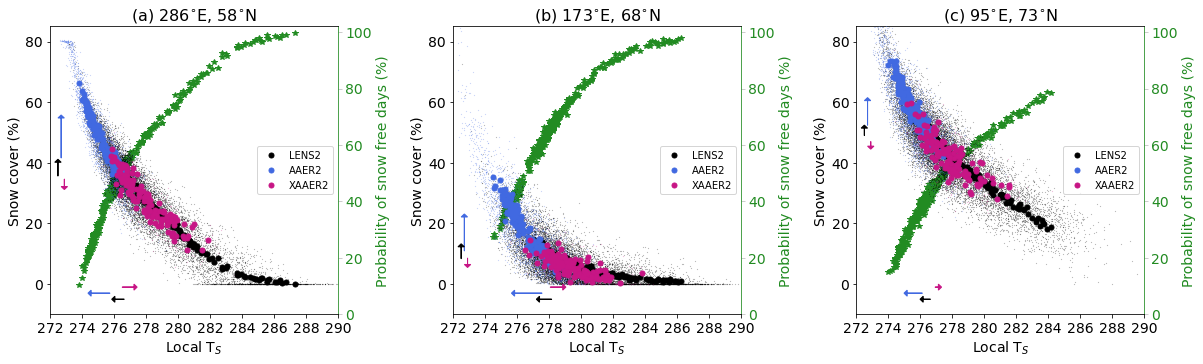

In [12]:
fig = plt.figure(figsize=(16,16))


#--------------------Snow point 1
ax = setuppanel_fsno(lens2stack.isel(point=0), aer2stack.isel(point=0), xaer2stack.isel(point=0),
                     lens2em.isel(point=0), aer2em.isel(point=0), xaer2em.isel(point=0), 0.05,0.3,0.7,0.95)
ax.set_ylim(-10,85)
ax.set_xlim(272,290)
ax.set_xticks([272,274,276,278,280,282,284,286,288,290])
ax.set_xticklabels(['272','274','276','278','280','282','284','286','288','290'], fontsize=14)
ax.set_yticks([0,20,40,60,80])
ax.set_yticklabels(['0','20','40','60','80'], fontsize=14)
ax.set_zorder(1)
ax.set_frame_on(False)
ax.set_title('(a) '+str(np.int(lens2em.lon.isel(point=0)))+'$^{\circ}$E, '+str(np.int(lens2em.lat.isel(point=0)))+'$^{\circ}$N', fontsize=16)

ax2 = setuptwinaxis_fsno(ax)
ax2.plot(lens2em.TREFHT.isel(point=0), pnosnow.pnosnow.isel(points=0),"*", color='forestgreen', zorder=0)
ax2.plot(aer2em.TREFHT.isel(point=0), pnosnow_aer2.pnosnow.isel(points=0),"*", color='forestgreen', zorder=0)

ax.arrow(aer2_1920_1940.TREFHT.isel(point=0),-3,aer2anoms_1960_1980.TREFHT.isel(point=0),0,color='royalblue',
         head_width=2, head_length=0.2)
ax.arrow(xaer2_1920_1940.TREFHT.isel(point=0),-1,xaer2anoms_1960_1980.TREFHT.isel(point=0),0,color='mediumvioletred',
         head_width=2, head_length=0.2)
ax.arrow(lens2_1920_1940.TREFHT.isel(point=0),-5,lens2anoms_1960_1980.TREFHT.isel(point=0),0,color='black',
         head_width=2, head_length=0.2)

ax.arrow(272.7, 100.*aer2_1920_1940.FSNO.isel(point=0),0,100.*aer2anoms_1960_1980.FSNO.isel(point=0),color='royalblue',
         head_width=0.4, head_length=1)
ax.arrow(272.9, 100.*xaer2_1920_1940.FSNO.isel(point=0),0,100.*xaer2anoms_1960_1980.FSNO.isel(point=0),color='mediumvioletred',
         head_width=0.4, head_length=1)
ax.arrow(272.5, 100.*lens2_1920_1940.FSNO.isel(point=0),0,100.*lens2anoms_1960_1980.FSNO.isel(point=0),color='black',
         head_width=0.4, head_length=1)

ax.legend(loc='center right')
#----------------------------------

#--------------------Snow point 2
ax = setuppanel_fsno(lens2stack.isel(point=1), aer2stack.isel(point=1), xaer2stack.isel(point=1),
                     lens2em.isel(point=1), aer2em.isel(point=1), xaer2em.isel(point=1), 0.4,0.65,0.7,0.95)
ax.set_ylim(-10,85)
ax.set_xlim(272,290)
ax.set_xticks([272,274,276,278,280,282,284,286,288,290])
ax.set_xticklabels(['272','274','276','278','280','282','284','286','288','290'], fontsize=14)
ax.set_yticks([0,20,40,60,80])
ax.set_yticklabels(['0','20','40','60','80'], fontsize=14)
ax.set_zorder(1)
ax.set_frame_on(False)
ax.set_title('(b) '+str(np.int(lens2em.lon.isel(point=1)))+'$^{\circ}$E, '+str(np.int(lens2em.lat.isel(point=1)))+'$^{\circ}$N', fontsize=16)

ax2 = setuptwinaxis_fsno(ax)
ax2.plot(lens2em.TREFHT.isel(point=1), pnosnow.pnosnow.isel(points=1),"*", color='forestgreen', zorder=0)
ax2.plot(aer2em.TREFHT.isel(point=1), pnosnow_aer2.pnosnow.isel(points=1),"*", color='forestgreen', zorder=0)

ax.arrow(aer2_1920_1940.TREFHT.isel(point=1),-3,aer2anoms_1960_1980.TREFHT.isel(point=1),0,color='royalblue',
         head_width=2, head_length=0.2)
ax.arrow(xaer2_1920_1940.TREFHT.isel(point=1),-1,xaer2anoms_1960_1980.TREFHT.isel(point=1),0,color='mediumvioletred',
         head_width=2, head_length=0.2)
ax.arrow(lens2_1920_1940.TREFHT.isel(point=1),-5,lens2anoms_1960_1980.TREFHT.isel(point=1),0,color='black',
         head_width=2, head_length=0.2)

ax.arrow(272.7, 100.*aer2_1920_1940.FSNO.isel(point=1),0,100.*aer2anoms_1960_1980.FSNO.isel(point=1),color='royalblue',
         head_width=0.4, head_length=1)
ax.arrow(272.9, 100.*xaer2_1920_1940.FSNO.isel(point=1),0,100.*xaer2anoms_1960_1980.FSNO.isel(point=1),color='mediumvioletred',
         head_width=0.4, head_length=1)
ax.arrow(272.5, 100.*lens2_1920_1940.FSNO.isel(point=1),0,100.*lens2anoms_1960_1980.FSNO.isel(point=1),color='black',
         head_width=0.4, head_length=1)

ax.legend(loc='center right')
#----------------------------------


#----------------Snow point 3
ax = setuppanel_fsno(lens2stack.isel(point=2), aer2stack.isel(point=2), xaer2stack.isel(point=2),
                     lens2em.isel(point=2), aer2em.isel(point=2), xaer2em.isel(point=2), 0.75,1.,0.7,0.95)
ax.set_ylim(-10,85)
ax.set_xlim(272,290)
ax.set_xticks([272,274,276,278,280,282,284,286,288,290])
ax.set_xticklabels(['272','274','276','278','280','282','284','286','288','290'], fontsize=14)
ax.set_yticks([0,20,40,60,80])
ax.set_yticklabels(['0','20','40','60','80'], fontsize=14)
ax.set_zorder(1)
ax.set_frame_on(False)
ax.set_title('(c) '+str(np.int(lens2em.lon.isel(point=2)))+'$^{\circ}$E, '+str(np.int(lens2em.lat.isel(point=2)))+'$^{\circ}$N', fontsize=16)

ax2 = setuptwinaxis_fsno(ax)
ax2.plot(lens2em.TREFHT.isel(point=2), pnosnow.pnosnow.isel(points=2),"*", color='forestgreen', zorder=0)
ax2.plot(aer2em.TREFHT.isel(point=2), pnosnow_aer2.pnosnow.isel(points=2),"*", color='forestgreen', zorder=0)

ax.arrow(aer2_1920_1940.TREFHT.isel(point=2),-3,aer2anoms_1960_1980.TREFHT.isel(point=2),0,color='royalblue',
         head_width=2, head_length=0.2)
ax.arrow(xaer2_1920_1940.TREFHT.isel(point=2),-1,xaer2anoms_1960_1980.TREFHT.isel(point=2),0,color='mediumvioletred',
         head_width=2, head_length=0.2)
ax.arrow(lens2_1920_1940.TREFHT.isel(point=2),-5,lens2anoms_1960_1980.TREFHT.isel(point=2),0,color='black',
         head_width=2, head_length=0.2)

ax.arrow(272.7, 100.*aer2_1920_1940.FSNO.isel(point=2),0,100.*aer2anoms_1960_1980.FSNO.isel(point=2),color='royalblue',
         head_width=0.4, head_length=1)
ax.arrow(272.9, 100.*xaer2_1920_1940.FSNO.isel(point=2),0,100.*xaer2anoms_1960_1980.FSNO.isel(point=2),color='mediumvioletred',
         head_width=0.4, head_length=1)
ax.arrow(272.5, 100.*lens2_1920_1940.FSNO.isel(point=2),0,100.*lens2anoms_1960_1980.FSNO.isel(point=2),color='black',
         head_width=0.4, head_length=1)

ax.legend(loc='center right')

fig.savefig(plotpath+'fig7.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig7.pdf', bbox_inches='tight', facecolor='white')

### Potential supplemental figure

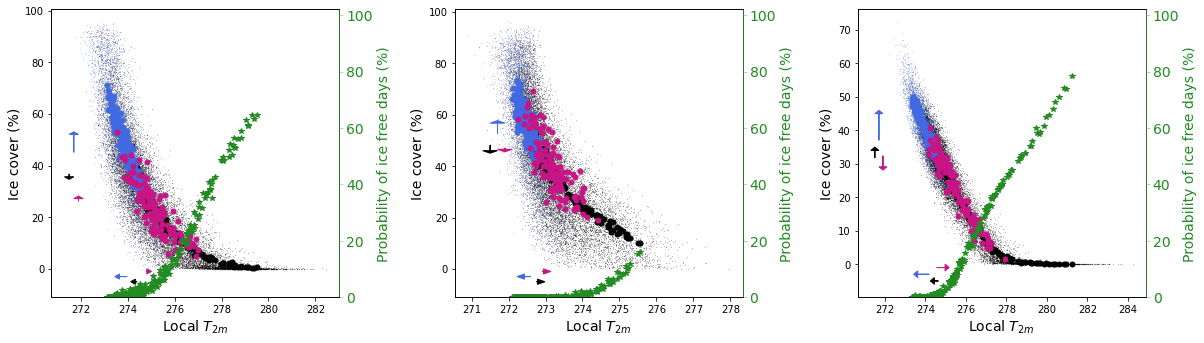

In [25]:
fig = plt.figure(figsize=(16,16))

#-------------------------------Ice point 0
ax = setuppanel_ice(lens2stack_ice.isel(point=0), aer2stack_ice.isel(point=0), xaer2stack_ice.isel(point=0),
                    lens2em_ice.isel(point=0), aer2em_ice.isel(point=0), xaer2em_ice.isel(point=0),0.05,0.3,0.4,0.65)

ax2 = setuptwinaxis_ice(ax)
ax2.plot(lens2em_ice.TREFHT.isel(point=0), pnoice.pnoice.isel(points=0),"*", color='forestgreen', zorder=0)
ax2.plot(aer2em_ice.TREFHT.isel(point=0), pnoice_aer2.pnoice.isel(points=0),"*", color='forestgreen', zorder=0)


ax.arrow(aer2_1920_1940_ice.TREFHT.isel(point=0),-3,aer2anoms_1960_1980_ice.TREFHT.isel(point=0),0,color='royalblue',
         head_width=2, head_length=0.2)
ax.arrow(xaer2_1920_1940_ice.TREFHT.isel(point=0),-1,xaer2anoms_1960_1980_ice.TREFHT.isel(point=0),0,color='mediumvioletred',
         head_width=2, head_length=0.2)
ax.arrow(lens2_1920_1940_ice.TREFHT.isel(point=0),-5,lens2anoms_1960_1980_ice.TREFHT.isel(point=0),0,color='black',
         head_width=2, head_length=0.2)

ax.arrow(271.7, 100.*aer2_1920_1940_ice.ICEFRAC.isel(point=0),0,100.*aer2anoms_1960_1980_ice.ICEFRAC.isel(point=0),color='royalblue',
         head_width=0.4, head_length=1)
ax.arrow(271.9, 100.*xaer2_1920_1940_ice.ICEFRAC.isel(point=0),0,100.*xaer2anoms_1960_1980_ice.ICEFRAC.isel(point=0),color='mediumvioletred',
         head_width=0.4, head_length=1)
ax.arrow(271.5, 100.*lens2_1920_1940_ice.ICEFRAC.isel(point=0),0,100.*lens2anoms_1960_1980_ice.ICEFRAC.isel(point=0),color='black',
         head_width=0.4, head_length=1)


#-------------------------------Ice point 2
ax = setuppanel_ice(lens2stack_ice.isel(point=1), aer2stack_ice.isel(point=1), xaer2stack_ice.isel(point=1),
                    lens2em_ice.isel(point=1), aer2em_ice.isel(point=1), xaer2em_ice.isel(point=1),0.4,0.65,0.4,0.65)

ax2 = setuptwinaxis_ice(ax)
ax2.plot(lens2em_ice.TREFHT.isel(point=1), pnoice.pnoice.isel(points=1),"*", color='forestgreen', zorder=0)
ax2.plot(aer2em_ice.TREFHT.isel(point=1), pnoice_aer2.pnoice.isel(points=1),"*", color='forestgreen', zorder=0)


ax.arrow(aer2_1920_1940_ice.TREFHT.isel(point=1),-3,aer2anoms_1960_1980_ice.TREFHT.isel(point=1),0,color='royalblue',
         head_width=2, head_length=0.2)
ax.arrow(xaer2_1920_1940_ice.TREFHT.isel(point=1),-1,xaer2anoms_1960_1980_ice.TREFHT.isel(point=1),0,color='mediumvioletred',
         head_width=2, head_length=0.2)
ax.arrow(lens2_1920_1940_ice.TREFHT.isel(point=1),-5,lens2anoms_1960_1980_ice.TREFHT.isel(point=1),0,color='black',
         head_width=2, head_length=0.2)

ax.arrow(271.7, 100.*aer2_1920_1940_ice.ICEFRAC.isel(point=1),0,100.*aer2anoms_1960_1980_ice.ICEFRAC.isel(point=1),color='royalblue',
         head_width=0.4, head_length=1)
ax.arrow(271.9, 100.*xaer2_1920_1940_ice.ICEFRAC.isel(point=1),0,100.*xaer2anoms_1960_1980_ice.ICEFRAC.isel(point=1),color='mediumvioletred',
         head_width=0.4, head_length=1)
ax.arrow(271.5, 100.*lens2_1920_1940_ice.ICEFRAC.isel(point=1),0,100.*lens2anoms_1960_1980_ice.ICEFRAC.isel(point=1),color='black',
         head_width=0.4, head_length=1)


#-------------------------------Ice point 3
ax = setuppanel_ice(lens2stack_ice.isel(point=2), aer2stack_ice.isel(point=2), xaer2stack_ice.isel(point=2),
                    lens2em_ice.isel(point=2), aer2em_ice.isel(point=2), xaer2em_ice.isel(point=2),0.75,1.,0.4,0.65)

ax2 = setuptwinaxis_ice(ax)
ax2.plot(lens2em_ice.TREFHT.isel(point=2), pnoice.pnoice.isel(points=2),"*", color='forestgreen', zorder=0)
ax2.plot(aer2em_ice.TREFHT.isel(point=2), pnoice_aer2.pnoice.isel(points=2),"*", color='forestgreen', zorder=0)


ax.arrow(aer2_1920_1940_ice.TREFHT.isel(point=2),-3,aer2anoms_1960_1980_ice.TREFHT.isel(point=2),0,color='royalblue',
         head_width=2, head_length=0.2)
ax.arrow(xaer2_1920_1940_ice.TREFHT.isel(point=2),-1,xaer2anoms_1960_1980_ice.TREFHT.isel(point=2),0,color='mediumvioletred',
         head_width=2, head_length=0.2)
ax.arrow(lens2_1920_1940_ice.TREFHT.isel(point=2),-5,lens2anoms_1960_1980_ice.TREFHT.isel(point=2),0,color='black',
         head_width=2, head_length=0.2)

ax.arrow(271.7, 100.*aer2_1920_1940_ice.ICEFRAC.isel(point=2),0,100.*aer2anoms_1960_1980_ice.ICEFRAC.isel(point=2),color='royalblue',
         head_width=0.4, head_length=1)
ax.arrow(271.9, 100.*xaer2_1920_1940_ice.ICEFRAC.isel(point=2),0,100.*xaer2anoms_1960_1980_ice.ICEFRAC.isel(point=2),color='mediumvioletred',
         head_width=0.4, head_length=1)
ax.arrow(271.5, 100.*lens2_1920_1940_ice.ICEFRAC.isel(point=2),0,100.*lens2anoms_1960_1980_ice.ICEFRAC.isel(point=2),color='black',
         head_width=0.4, head_length=1)


